# Weather Alpes

Al entregar la solución de este parcial, yo, Juan Sebastian Pinzon Sampedro con código 202013144 me comprometo a no
conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre
aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o
intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy
consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este
parcial.

## Entendimiento de los datos

### Enunciado

El cambio climático, entendido como los cambios a largo plazo de la temperatura terrestre, además
de otros patrones climáticos, es una de las grandes problemáticas de la actualidad. Es ocasionado
principalmente por la emisión descontrolada de Gases de Efecto Invernadero (GEI), producto de la
quema de combustibles fósiles como el carbón, el petróleo y el gas. “La temperatura media de la Tierra
es ahora 1.1 °C más elevada que a finales del siglo XIX, antes de la revolución industrial, y más elevada
en términos absolutos que en los últimos 100 mil años.

WeatherAlpes es una organización sin ánimo de lucro que tiene como misión articular diferentes
acciones enfocadas en la reducción de emisiones de GEI. En conjunto con gobiernos y empresas
privadas, WeatherAlpes busca construir recomendaciones de políticas públicas que aseguren en el
mediano y largo plazo la sostenibilidad económica y ambiental mientras se controla el cambio
climático.

Para construir dichas recomendaciones de políticas públicas, WeatherAlpes se apoya en el análisis
de diferentes fuentes de información, entre ellas información climática y ambiental de diferentes
regiones del planeta, en conjunto con técnicas de aprendizaje automático para la extracción de
patrones relevantes de estas fuentes.

### Carga y visualizacion de los datos

In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
wa_data = pd.read_csv("./data/weather_sample.csv", index_col = 0)

In [2]:
wa_data.head(5)

,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rwanda,Kigali,-1.95,30.06,Africa/Kigali,1693870200,2023-09-05 01:30,0,0,Partly cloudy,3.8,6.1,80,E,1019.0,30.09,0.2,0.01,69,50,21.0,69.8,10.0,6.0,1.0,5.1,8.3,554.1,17.0,4.6,0.4,21.5,34.3,2,2,05:57 AM,06:01 PM,10:03 PM,09:32 AM,Waning Gibbous,79
Angola,Luanda,-8.84,13.23,Africa/Luanda,1694558700,2023-09-12 23:45,0,0,Clear,6.9,11.2,200,SSW,1012.0,29.88,0.0,0.00,83,0,24.5,76.1,8.0,4.0,1.0,13.4,21.6,500.7,63.7,3.7,2.3,7.0,22.3,1,1,06:03 AM,06:04 PM,04:22 AM,04:17 PM,Waning Crescent,8
Brazil,Bras,-2.08,-58.17,America/Manaus,1693364400,2023-08-29 23:00,0,0,Clear,3.4,5.4,55,NE,1010.0,29.82,0.0,0.00,38,6,26.7,80.1,10.0,6.0,1.0,6.9,11.2,363.8,25.8,0.4,0.3,2.8,3.8,1,1,05:52 AM,05:55 PM,05:49 PM,05:25 AM,Full Moon,98
Myanmar,Pathein,16.78,94.73,Asia/Yangon,1695162600,2023-09-20 05:00,0,0,Mist,5.4,8.6,172,S,1010.0,29.81,0.0,0.00,96,61,27.8,82.1,2.0,1.0,1.0,9.3,14.9,290.4,27.2,1.0,0.2,3.6,4.2,1,1,06:00 AM,06:10 PM,09:15 AM,08:51 PM,Waxing Crescent,14
United States of America,Washington Park,46.60,-120.49,America/Los_Angeles,1694730600,2023-09-14 15:30,0,0,Sunny,4.3,6.8,120,ESE,1019.0,30.09,0.0,0.00,26,0,26.1,79.1,16.0,9.0,8.0,6.7,10.8,193.6,98.7,1.0,0.2,1.8,2.3,1,1,06:38 AM,07:16 PM,06:05 AM,07:27 PM,New Moon,1


In [3]:
wa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Rwanda to Egypt
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   location_name                 20 non-null     object 
 1   latitude                      20 non-null     float64
 2   longitude                     20 non-null     float64
 3   timezone                      20 non-null     object 
 4   last_updated_epoch            20 non-null     int64  
 5   last_updated                  20 non-null     object 
 6   temperature_celsius           20 non-null     int64  
 7   temperature_fahrenheit        20 non-null     int64  
 8   condition_text                20 non-null     object 
 9   wind_mph                      20 non-null     float64
 10  wind_kph                      20 non-null     float64
 11  wind_degree                   20 non-null     int64  
 12  wind_direction                20 non-null     object 
 13  pres

In [4]:
wa_data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,20.000000,20.000000,2.000000e+01,20.0,20.0,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,21.862000,25.747500,1.694121e+09,0.0,0.0,5.895000,9.495000,214.20000,1014.00000,29.941000,0.145000,0.006000,64.300000,33.400000,25.750000,78.345000,9.650000,5.55000,1.900000,9.960000,16.045000,357.400000,50.825000,8.415000,6.195000,22.615000,54.745000,1.600000,2.450000,50.400000
std,23.067668,71.165774,5.385182e+05,0.0,0.0,2.961947,4.775318,106.62803,5.00526,0.149803,0.414824,0.016983,28.224849,38.788767,4.846214,8.722112,2.924938,1.79106,2.221901,5.590443,8.997337,200.723182,43.082429,10.921021,8.933466,35.313473,119.911303,0.940325,2.684752,37.915974
min,-22.570000,-120.490000,1.693364e+09,0.0,0.0,2.200000,3.600000,54.00000,1005.00000,29.660000,0.000000,0.000000,8.000000,0.000000,16.000000,60.800000,2.000000,1.00000,1.000000,1.800000,2.900000,168.600000,0.000000,0.000000,0.000000,0.500000,0.700000,1.000000,1.000000,1.000000
25%,0.747500,1.937500,1.693719e+09,0.0,0.0,3.700000,5.925000,107.50000,1010.75000,29.845000,0.000000,0.000000,39.500000,0.000000,23.625000,74.525000,8.750000,4.75000,1.000000,6.525000,10.525000,218.650000,18.225000,1.150000,0.300000,2.750000,3.700000,1.000000,1.000000,12.500000
50%,27.005000,25.530000,1.694170e+09,0.0,0.0,6.150000,9.900000,240.00000,1014.00000,29.940000,0.000000,0.000000,73.000000,5.500000,25.600000,78.150000,10.000000,6.00000,1.000000,8.800000,14.100000,283.700000,37.350000,3.500000,1.700000,10.900000,21.500000,1.000000,1.500000,44.000000
75%,42.230000,50.565000,1.694559e+09,0.0,0.0,6.900000,11.200000,315.00000,1016.25000,30.007500,0.000000,0.000000,84.500000,75.000000,28.425000,83.200000,10.000000,6.00000,1.000000,13.575000,21.875000,424.725000,61.525000,11.300000,8.375000,22.675000,37.250000,2.000000,2.250000,90.500000
max,52.250000,169.530000,1.695163e+09,0.0,0.0,11.900000,19.100000,350.00000,1025.00000,30.270000,1.400000,0.060000,100.000000,100.000000,36.200000,97.200000,16.000000,9.00000,8.000000,22.800000,36.700000,1014.700000,151.600000,38.000000,33.900000,126.800000,542.400000,4.000000,10.000000,100.000000


<function matplotlib.pyplot.show(close=None, block=None)>

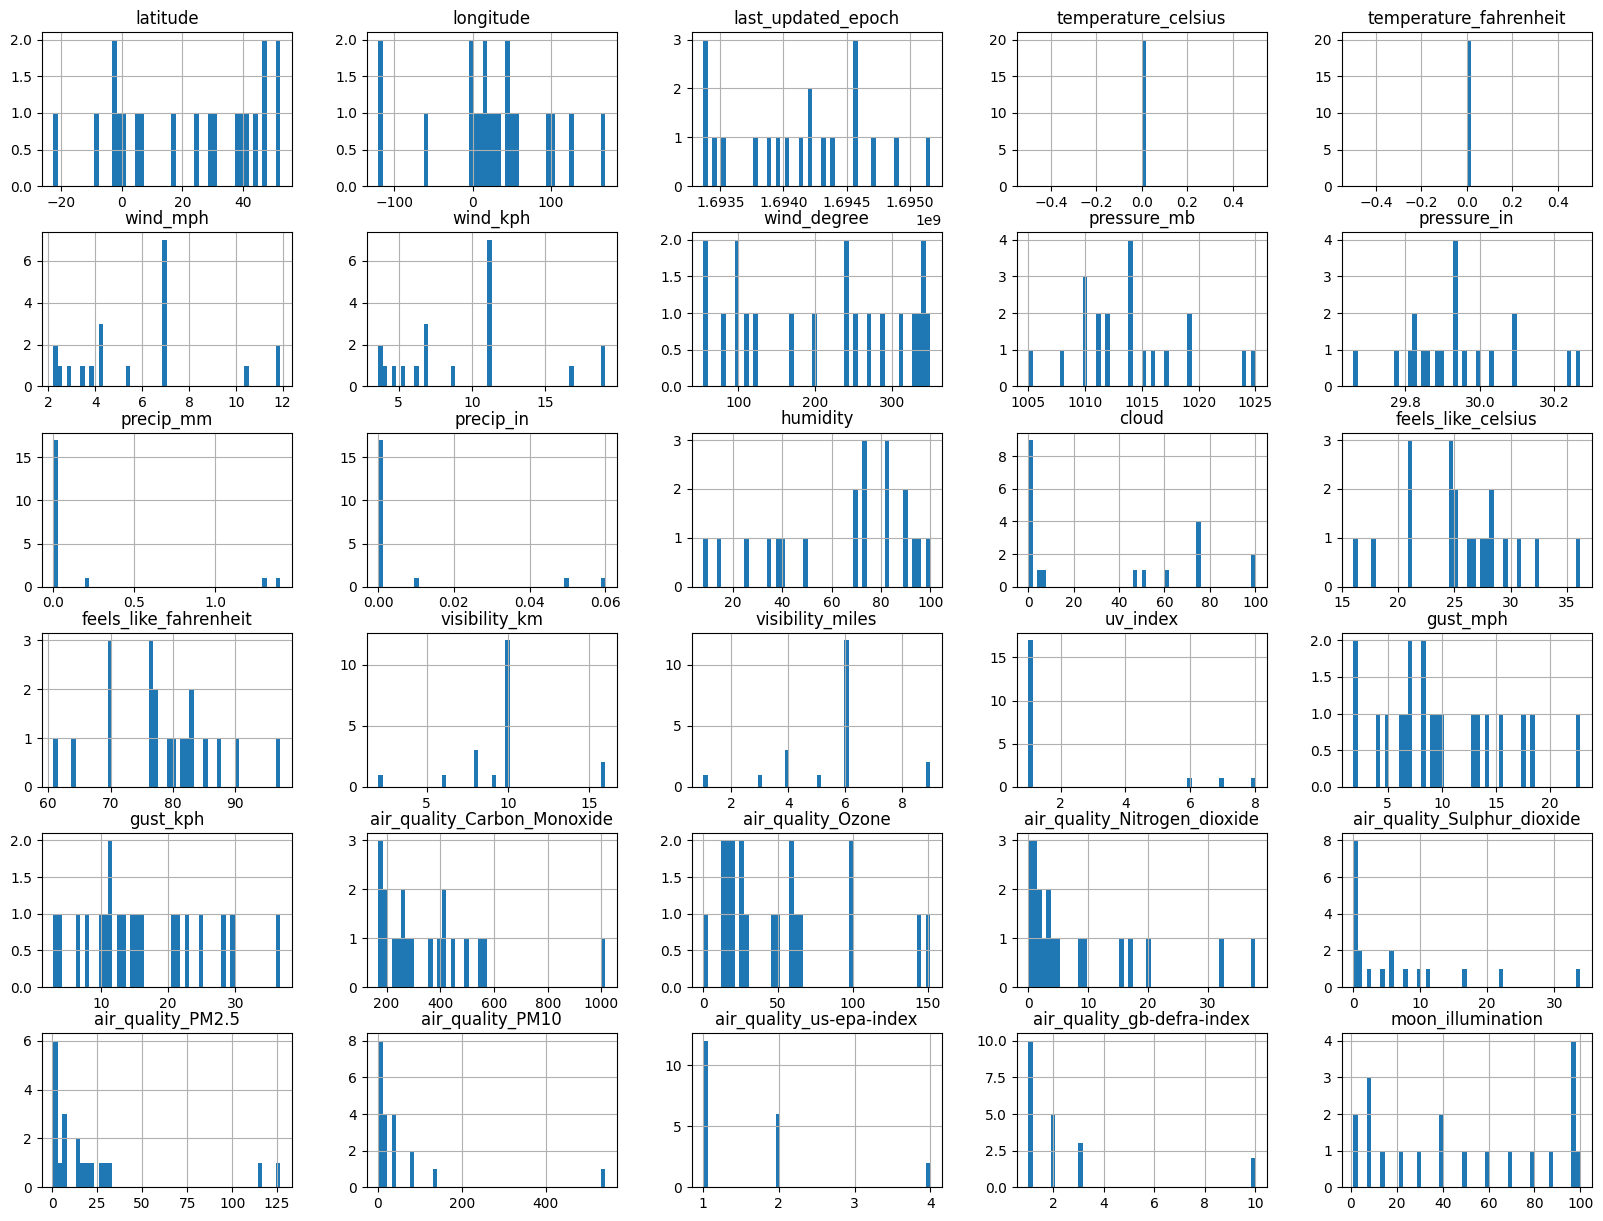

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
wa_data.hist(bins=50, figsize=(20,15))
plt.show

### Creacion de set de Prueba

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wa_data, test_size = 0.2, random_state = 42)

## Preparacion de lo datos

### Duplicados nulos y repetidos

In [7]:
wa_data["temperature_celsius"].value_counts()

temperature_celsius
0    20
Name: count, dtype: int64

In [8]:
wa_data["temperature_fahrenheit"].value_counts()

temperature_fahrenheit
0    20
Name: count, dtype: int64

Tanto la columna temperature_celsius como temperature_farenheit solo tienen el valor 0 por lo que no nos aportan ninguna informacion

In [9]:
wa_data.drop(["temperature_fahrenheit","temperature_celsius"], axis = 1, inplace = True)

In [10]:
(wa_data.isnull().sum()/wa_data.shape[0]).sort_values(ascending = False)

location_name                   0.0
air_quality_PM2.5               0.0
uv_index                        0.0
gust_mph                        0.0
gust_kph                        0.0
air_quality_Carbon_Monoxide     0.0
air_quality_Ozone               0.0
air_quality_Nitrogen_dioxide    0.0
air_quality_Sulphur_dioxide     0.0
air_quality_PM10                0.0
latitude                        0.0
air_quality_us-epa-index        0.0
air_quality_gb-defra-index      0.0
sunrise                         0.0
sunset                          0.0
moonrise                        0.0
moonset                         0.0
moon_phase                      0.0
visibility_miles                0.0
visibility_km                   0.0
feels_like_fahrenheit           0.0
feels_like_celsius              0.0
longitude                       0.0
timezone                        0.0
last_updated_epoch              0.0
last_updated                    0.0
condition_text                  0.0
wind_mph                    

In [11]:
wa_data.loc[wa_data.duplicated(subset = wa_data.columns[1:], keep = False)].sort_values(by='country').head(9)

,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### Distribucion de los datos

Muchas variables estan repetidas en el sentido de que es la misma medicion con diferentes unidades de medida por lo que removeremos las columnas con unidades de medida imperial

In [12]:
wa_data.drop(["gust_mph","gust_mph","feels_like_fahrenheit", "wind_mph", "pressure_in", "precip_in", "visibility_miles"], axis = 1, inplace = True)

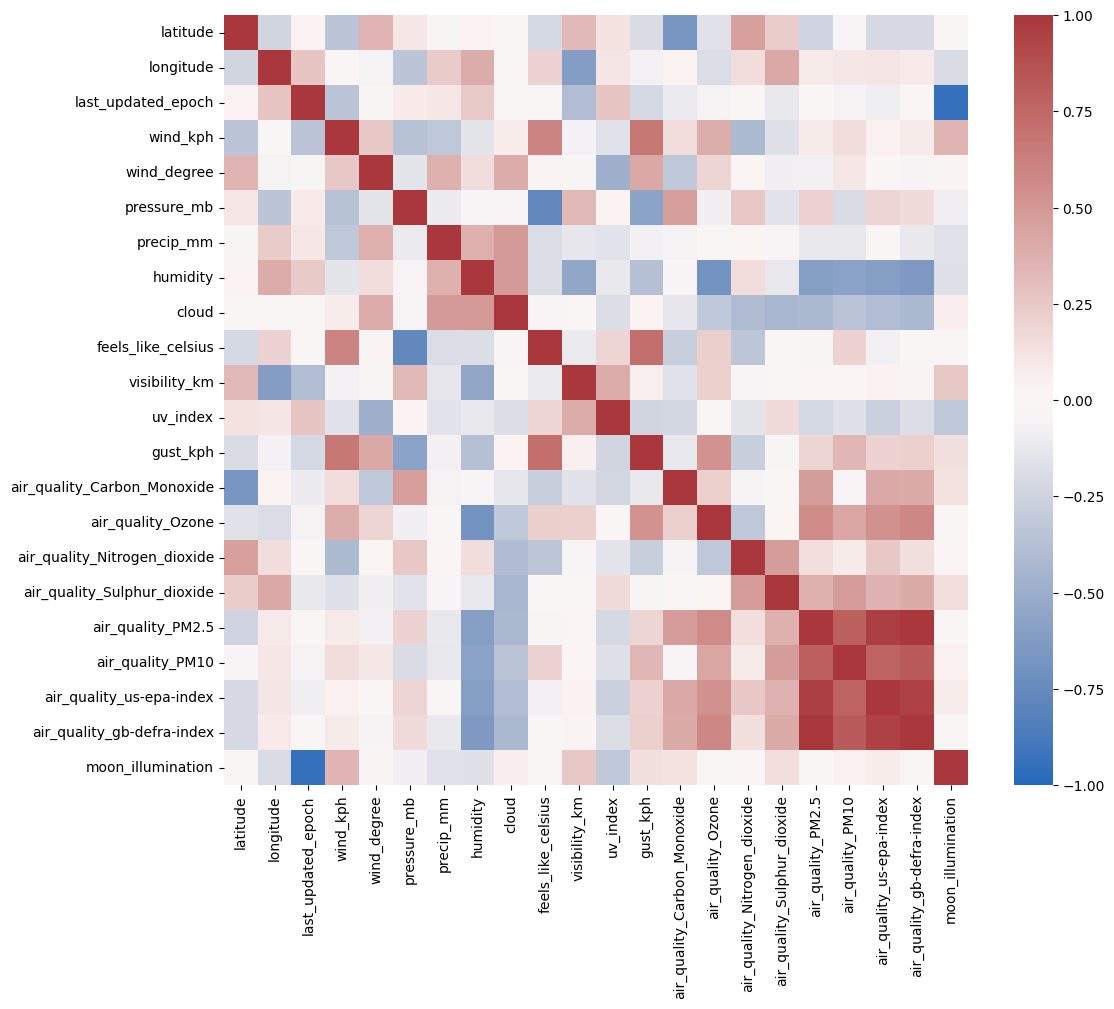

In [13]:
import seaborn as sns
fig = plt.figure(figsize = (12, 10))
sns.heatmap(wa_data.corr(numeric_only=True), cmap = 'vlag', vmin = -1, vmax = 1)
plt.show()

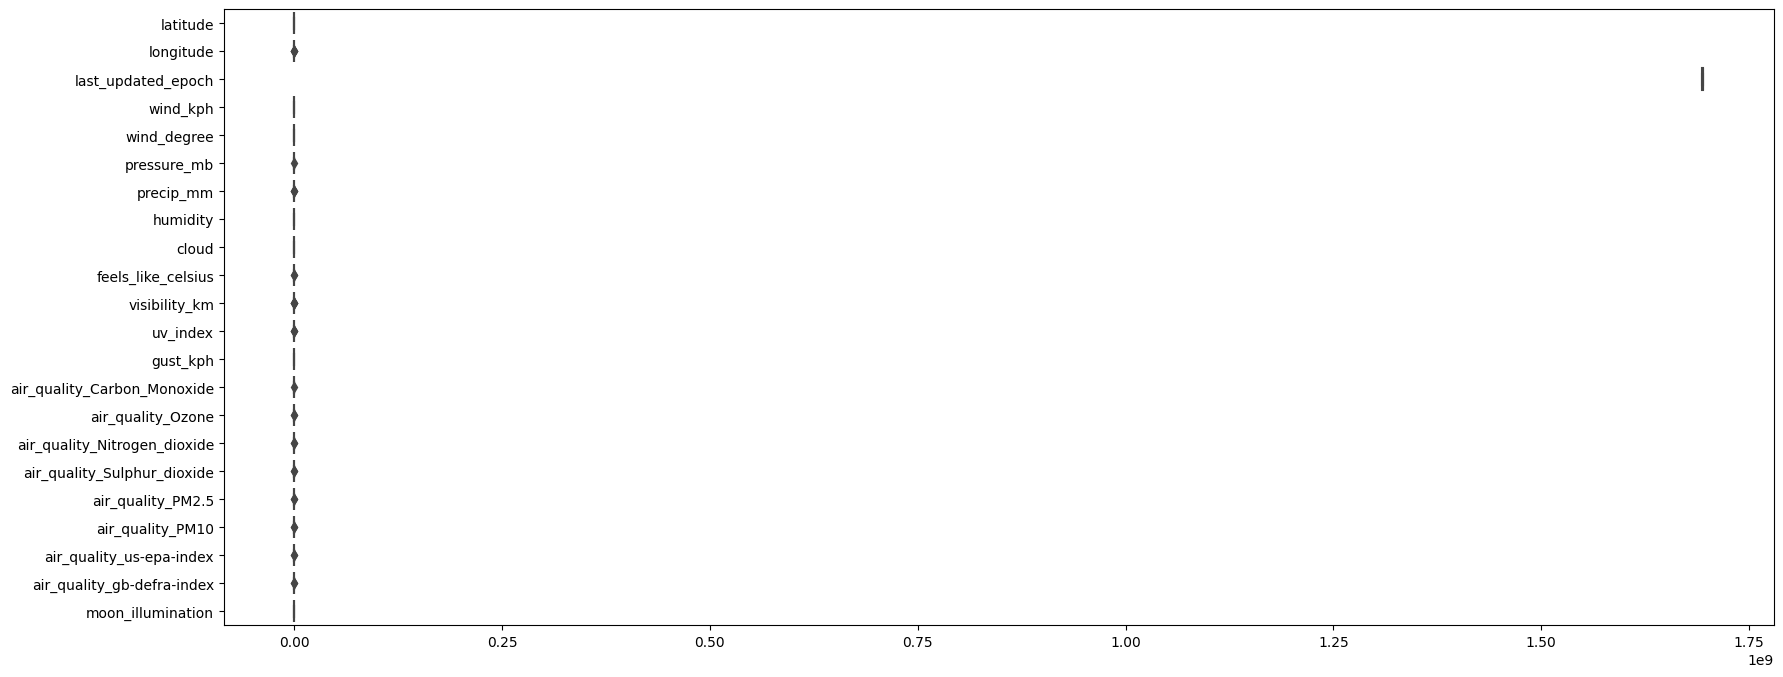

In [14]:
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data = wa_data, orient = 'h')

array([[<Axes: xlabel='air_quality_PM2.5', ylabel='air_quality_PM2.5'>,
        <Axes: xlabel='air_quality_us-epa-index', ylabel='air_quality_PM2.5'>,
        <Axes: xlabel='air_quality_gb-defra-index', ylabel='air_quality_PM2.5'>,
        <Axes: xlabel='air_quality_Carbon_Monoxide', ylabel='air_quality_PM2.5'>,
        <Axes: xlabel='air_quality_Ozone', ylabel='air_quality_PM2.5'>,
        <Axes: xlabel='air_quality_Nitrogen_dioxide', ylabel='air_quality_PM2.5'>,
        <Axes: xlabel='air_quality_Sulphur_dioxide', ylabel='air_quality_PM2.5'>],
       [<Axes: xlabel='air_quality_PM2.5', ylabel='air_quality_us-epa-index'>,
        <Axes: xlabel='air_quality_us-epa-index', ylabel='air_quality_us-epa-index'>,
        <Axes: xlabel='air_quality_gb-defra-index', ylabel='air_quality_us-epa-index'>,
        <Axes: xlabel='air_quality_Carbon_Monoxide', ylabel='air_quality_us-epa-index'>,
        <Axes: xlabel='air_quality_Ozone', ylabel='air_quality_us-epa-index'>,
        <Axes: xlabel='air_

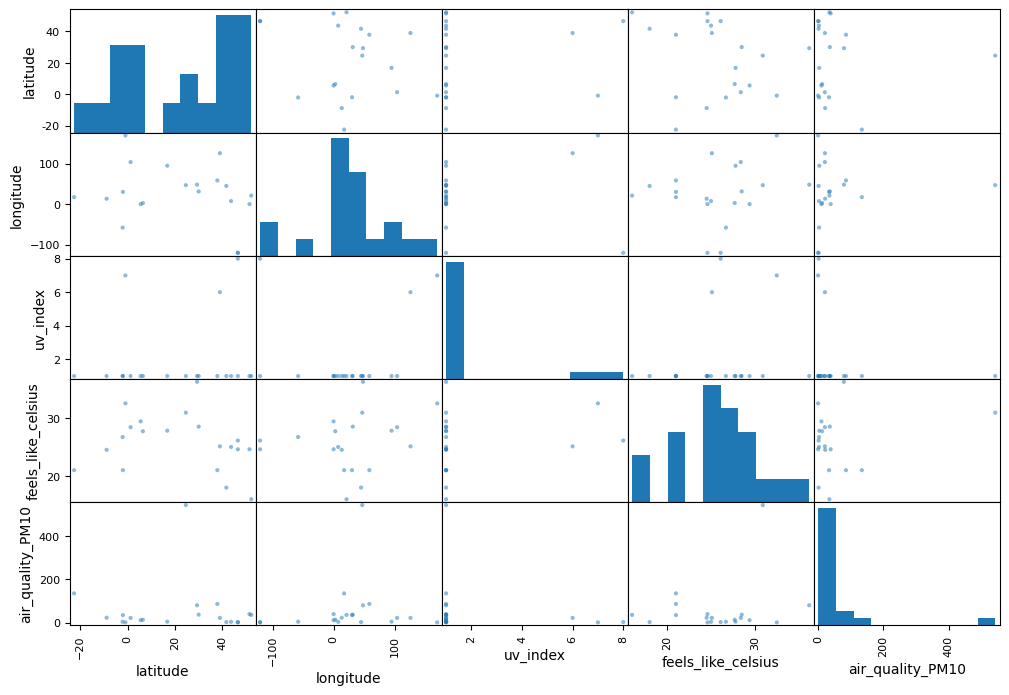

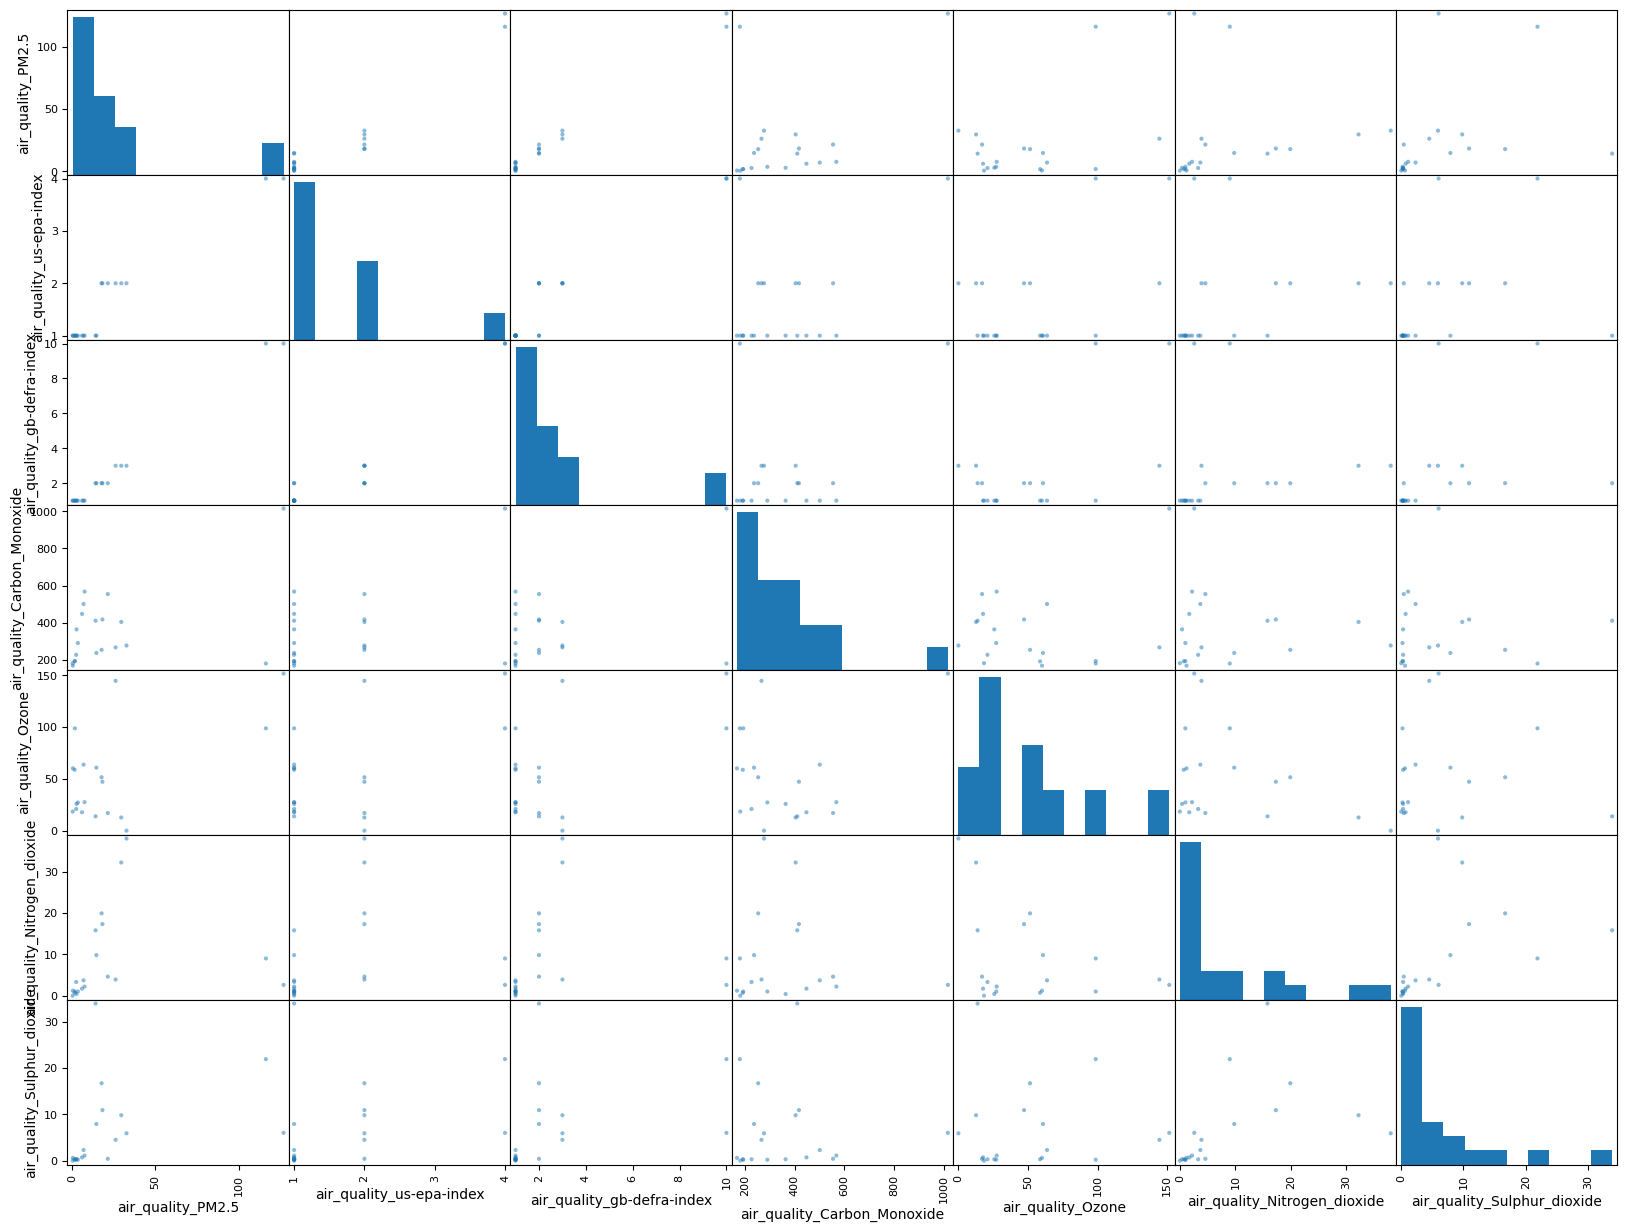

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["latitude", "longitude", "uv_index","feels_like_celsius", "air_quality_PM10"]
attributes2 = ["air_quality_PM2.5","air_quality_us-epa-index", "air_quality_gb-defra-index" ,"air_quality_Carbon_Monoxide","air_quality_Ozone", "air_quality_Nitrogen_dioxide","air_quality_Sulphur_dioxide"]
scatter_matrix(wa_data[attributes], figsize=(12, 8))
scatter_matrix(wa_data[attributes2], figsize= (20,15))

### Categorico vs nominal

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
condition_text = wa_data["condition_text"]
condition_text_encoded = encoder.fit_transform(condition_text)
print(encoder.classes_)
condition_text_encoded

['Clear' 'Mist' 'Overcast' 'Partly cloudy' 'Sunny']


array([3, 0, 0, 1, 4, 3, 0, 2, 0, 2, 3, 0, 0, 3, 0, 3, 4, 3, 0, 0])

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
condition_text_1hot = encoder.fit_transform(condition_text_encoded.reshape(-1,1))
condition_text_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [18]:
def average_air_quality_by_month_and_year(df):
    
    df['last_updated_datetime'] = pd.to_datetime(df['last_updated_epoch'], unit='s')
    df['year'] = df['last_updated_datetime'].dt.year
    df['month'] = df['last_updated_datetime'].dt.month
    df['year_month'] = df['year'] + df['month'] / 12.0    
    result_df = df.groupby(['year_month'])[['air_quality_PM10', 'air_quality_PM2.5', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_us-epa-index', 'air_quality_gb-defra-index']].mean().reset_index()
    
    return result_df

average_by_year = average_air_quality_by_month_and_year(train_set)
average_by_year

,year_month,air_quality_PM10,air_quality_PM2.5,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_us-epa-index,air_quality_gb-defra-index
0,2023.666667,42.55,11.850000,263.275000,70.475000,6.350000,5.525000,1.500000,1.75
1,2023.750000,69.65,29.333333,347.966667,49.083333,9.633333,7.291667,1.666667,3.00


In [19]:
features = ['air_quality_PM10', 'air_quality_PM2.5', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_us-epa-index', 'air_quality_gb-defra-index']
X_train, X_test, y_train, y_test = train_test_split(average_by_year[features],average_by_year["year_month"], test_size=0.3, random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
pd.DataFrame({"columns": objectives, "coef": regression.coef_})

NameError: name 'objectives' is not defined

In [ ]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [ ]:
average_by_year.hist(bins=50, figsize=(20,15))
plt.show

## Clustering

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import dendrogram

from sklearn_extra.cluster import KMedoids
import matplotlib.cm as cm

features = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index']

In [24]:
def plot_silhouette(X, n_clusters, random_state = 0):
    for n in n_clusters:
        kmeans_ = KMeans(n_clusters = n, random_state = random_state)
        preds_ = kmeans_.fit_predict(X)

        # Se calcula el coeficiente de silueta general
        silhouette_avg = silhouette_score(X, preds_)
        print('For n_clusters =', n, ', the average silhouette score is :', silhouette_avg )

        # Se calcula el coeficiente de silueta para cada instancia
        sample_silhouette_values = silhouette_samples(X, preds_)

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[preds_ == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title('The silhouette plot for the various clusters')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Cluster label')
        ax1.axvline(x=silhouette_avg, color = 'red', linestyle = '--')
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(preds_.astype(float) / n)
        ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = 'k')

        centers = kmeans_.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o', c = 'white', alpha = 1, s = 200, edgecolor = 'k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

        ax2.set_title('The visualization of the clustered data')
        ax2.set_xlabel('Feature space for the 1st feature')
        ax2.set_ylabel('Feature space for the 2nd feature')

        plt.suptitle('Silhouette analysis for KMeans clustering on sample data with n_clusters = %d' % n, fontsize = 14, fontweight = 'bold')

    plt.show()

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(wa_data[features])

In [26]:
n_clusters = range(2, 6)
kmeans_inertias = []

for n in n_clusters:
    kmeans_ = KMeans(n_clusters = n, random_state = 4)
    kmeans_.fit(X)
    kmeans_inertias.append(kmeans_.inertia_)

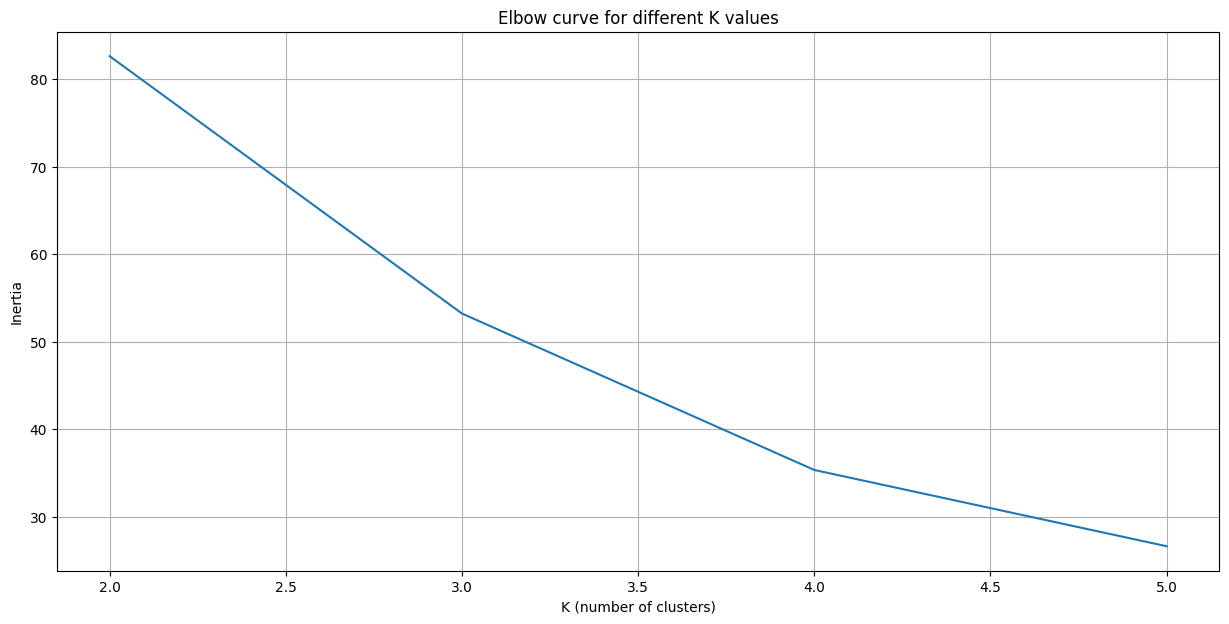

In [27]:
fig = plt.figure(figsize = (15, 7))
plt.plot(n_clusters, kmeans_inertias)
plt.title('Elbow curve for different K values')
plt.xlabel('K (number of clusters)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [28]:
n_clusters = [2, 3, 4, 5]

For n_clusters = 2 , the average silhouette score is : 0.6117392796156135
For n_clusters = 3 , the average silhouette score is : 0.41078831915987646
For n_clusters = 4 , the average silhouette score is : 0.39474651579826975
For n_clusters = 5 , the average silhouette score is : 0.27228584995920735


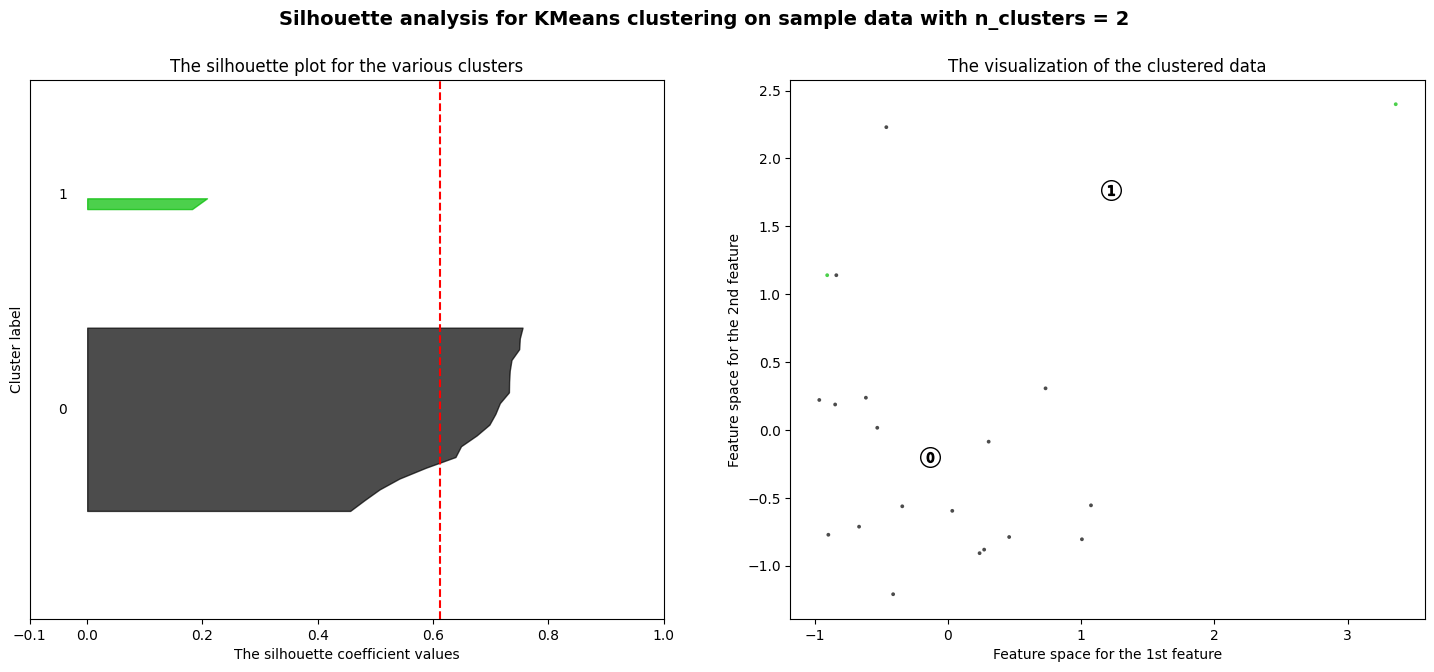

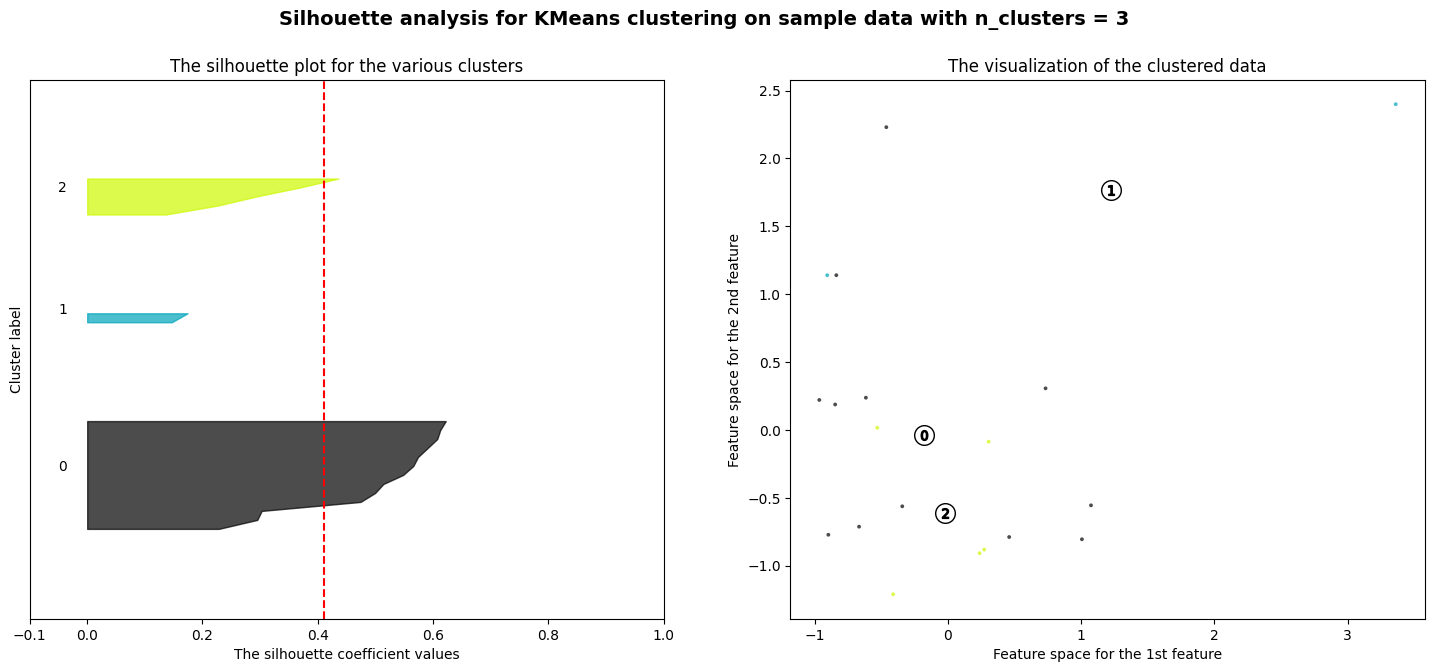

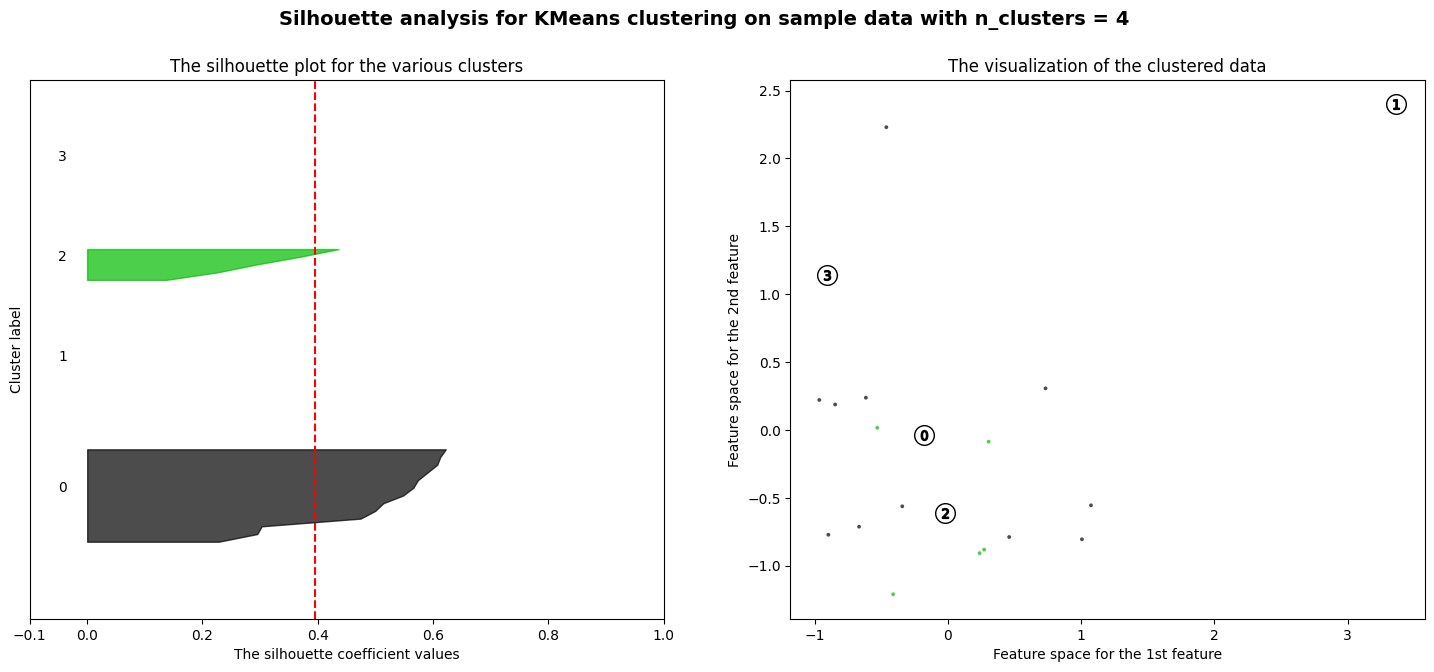

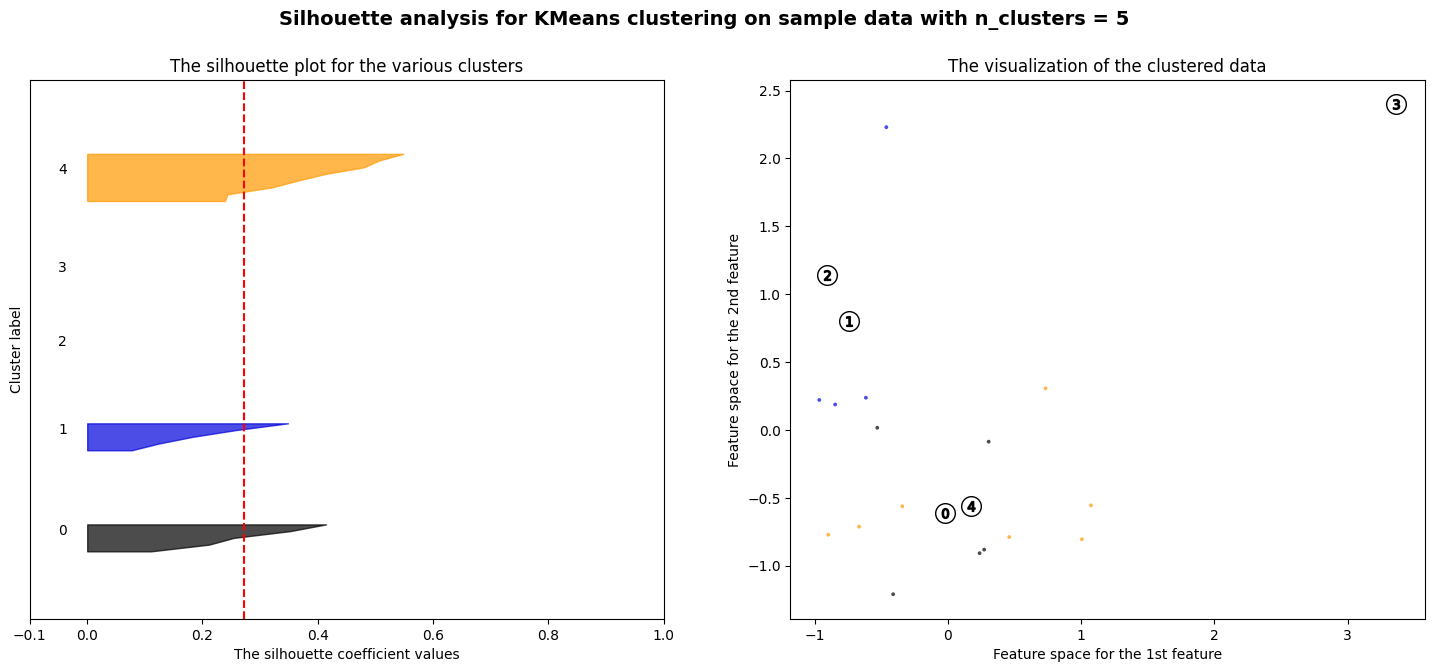

In [29]:
plot_silhouette(X, n_clusters, random_state = 4)

<Axes: ylabel='cluster'>

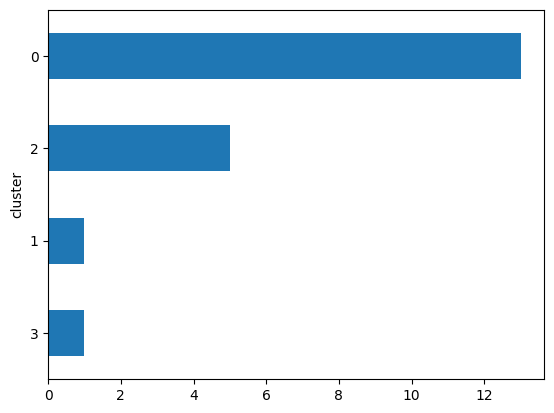

In [36]:
kmeans = KMeans(n_clusters = 4, random_state = 4)
wa_data['cluster'] = kmeans.fit_predict(X)
wa_data['cluster'].value_counts().sort_values().plot.barh()

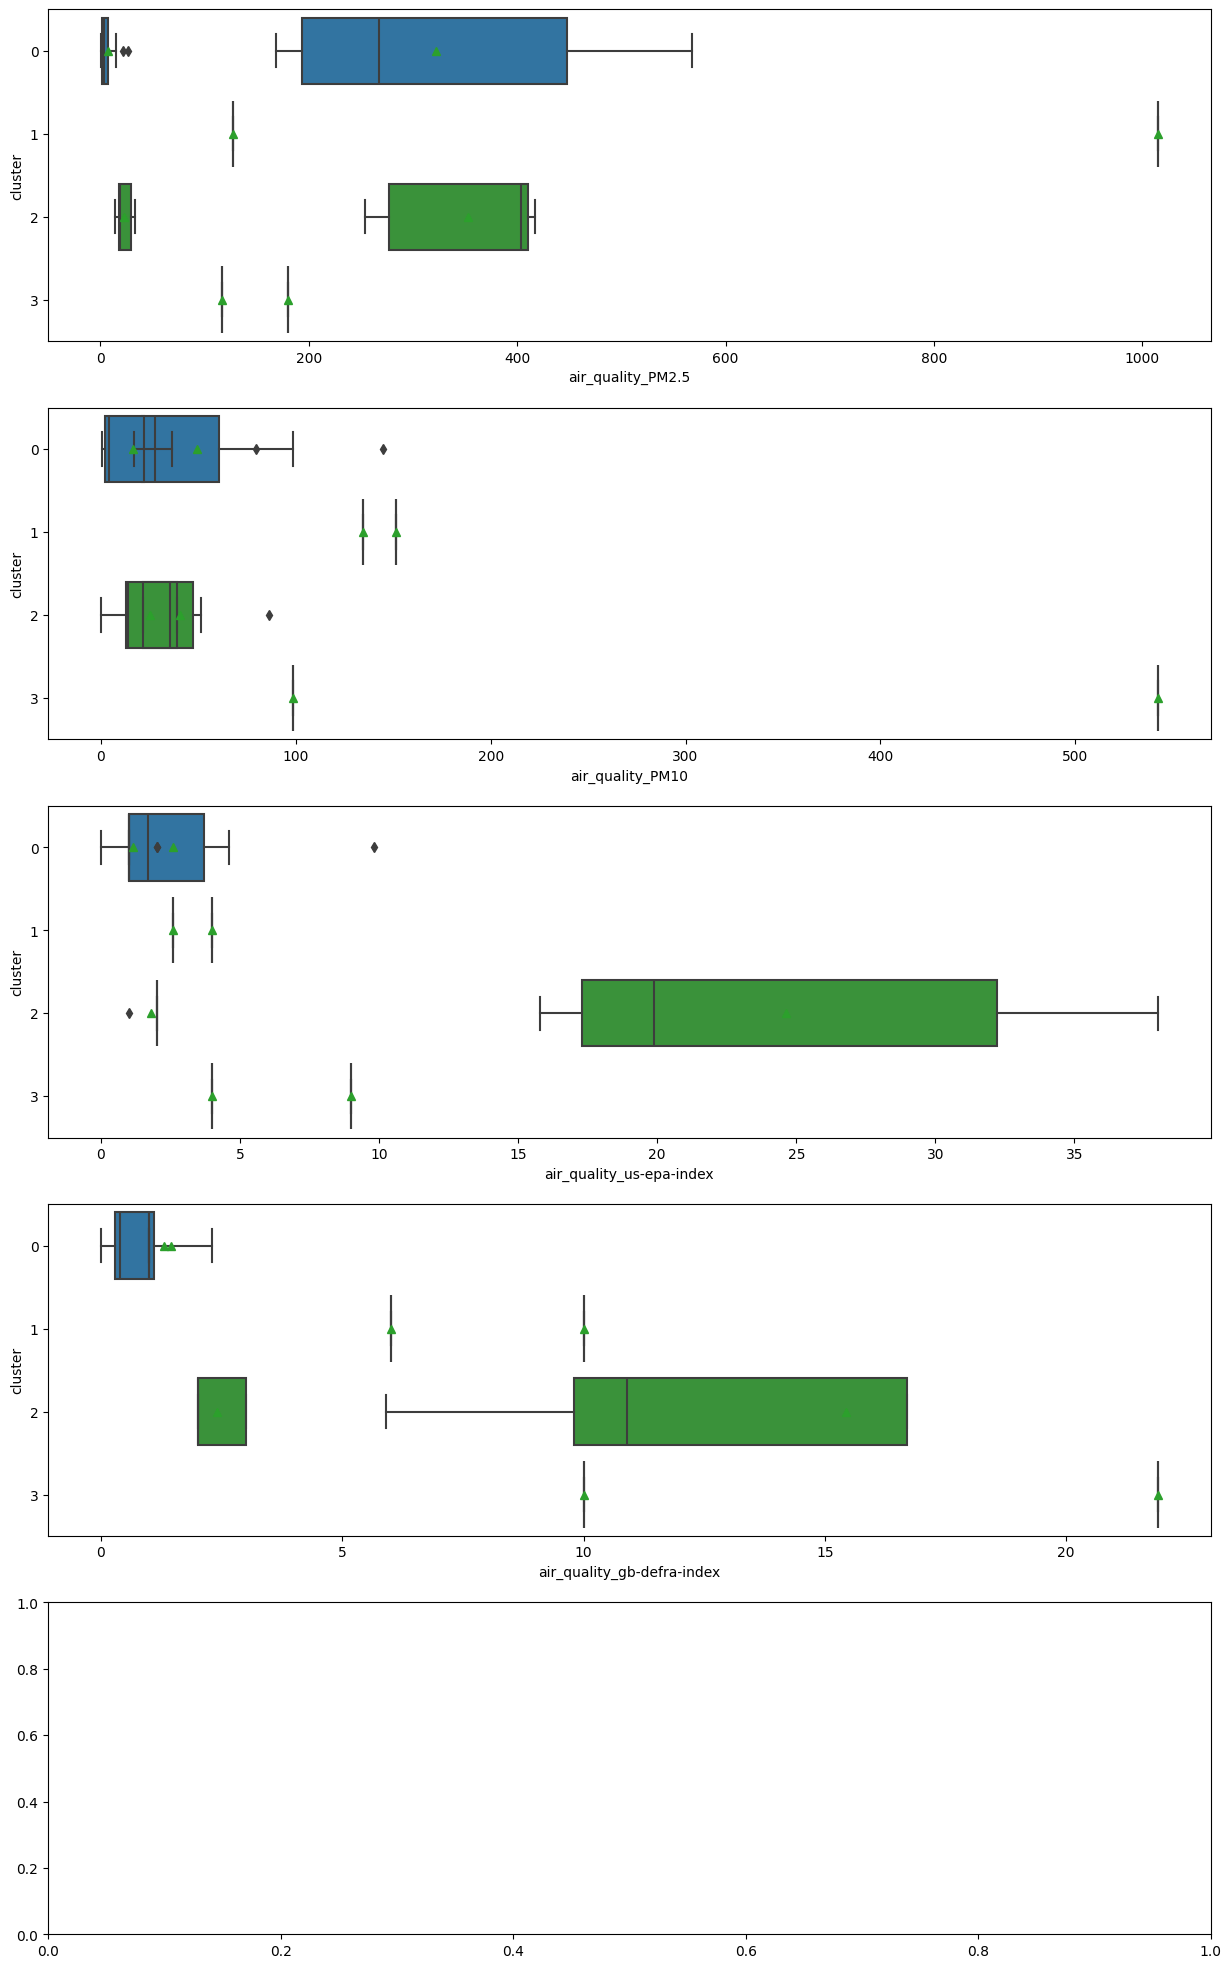

In [37]:
fig, axes = plt.subplots(5, 1, figsize = (15, 25))
['air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index']
sns.boxplot(data = wa_data, x = 'air_quality_Carbon_Monoxide', y = 'cluster', showmeans = True, orient = 'h', ax = axes[0])
sns.boxplot(data = wa_data, x = 'air_quality_Ozone', y = 'cluster', showmeans = True, orient = 'h', ax = axes[1])
sns.boxplot(data = wa_data, x = 'air_quality_Nitrogen_dioxide', y = 'cluster', showmeans = True, orient = 'h', ax = axes[2])
sns.boxplot(data = wa_data, x = 'air_quality_Sulphur_dioxide', y = 'cluster', showmeans = True, showfliers = False, orient = 'h', ax = axes[3])
sns.boxplot(data = wa_data, x = 'air_quality_PM2.5', y = 'cluster', showmeans = True, orient = 'h', ax = axes[0])
sns.boxplot(data = wa_data, x = 'air_quality_PM10', y = 'cluster', showmeans = True, orient = 'h', ax = axes[1])
sns.boxplot(data = wa_data, x = 'air_quality_us-epa-index', y = 'cluster', showmeans = True, orient = 'h', ax = axes[2])
sns.boxplot(data = wa_data, x = 'air_quality_gb-defra-index', y = 'cluster', showmeans = True, showfliers = False, orient = 'h', ax = axes[3])
plt.show()